# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [86]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [87]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #this was helpful here https://openweathermap.org/forecast16#example_JSON
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hayma'
City not found. Skipping...
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | mount pearl
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | kerman
Processing Record 11 of Set 1 | bayou cane
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | shahrak-e pabedana
City not found. Skipping...
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | mulayjah
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | espargos
City not found. Skipping...
Processin

In [88]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [89]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,7.51,41,0,0.88,RU,1694059025
1,la ronge,55.1001,-105.2842,12.14,76,75,2.06,CA,1694059026
2,west island,-12.1568,96.8225,26.99,69,40,5.14,CC,1694059026
3,vila franca do campo,37.7167,-25.4333,21.23,87,89,4.51,PT,1694058792
4,mount pearl,47.5166,-52.7813,20.19,95,20,6.17,CA,1694058788


In [90]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [91]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,7.51,41,0,0.88,RU,1694059025
1,la ronge,55.1001,-105.2842,12.14,76,75,2.06,CA,1694059026
2,west island,-12.1568,96.8225,26.99,69,40,5.14,CC,1694059026
3,vila franca do campo,37.7167,-25.4333,21.23,87,89,4.51,PT,1694058792
4,mount pearl,47.5166,-52.7813,20.19,95,20,6.17,CA,1694058788


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

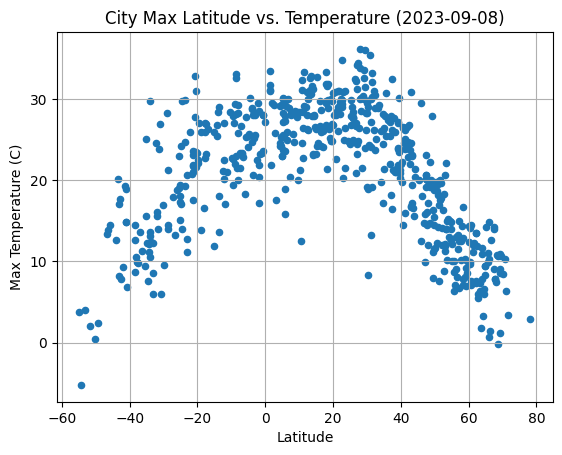

In [116]:
# Build scatter plot for latitude vs. temperature
#ok, bet
city_data_df.plot.scatter(x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

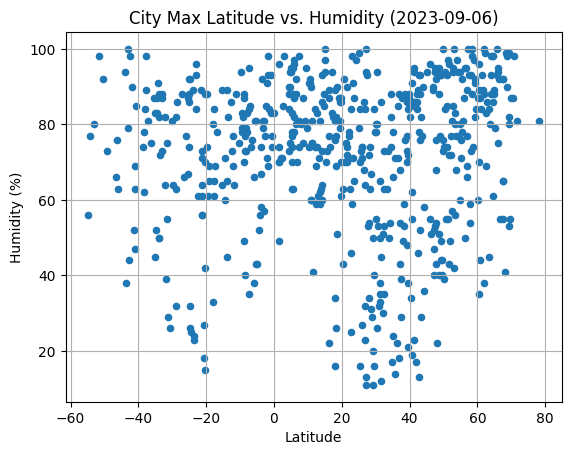

In [93]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

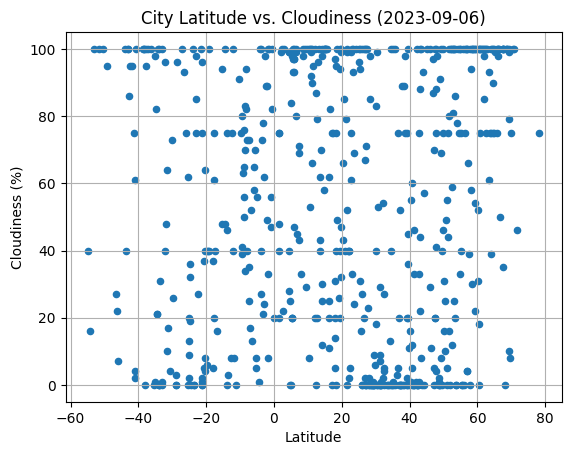

In [94]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

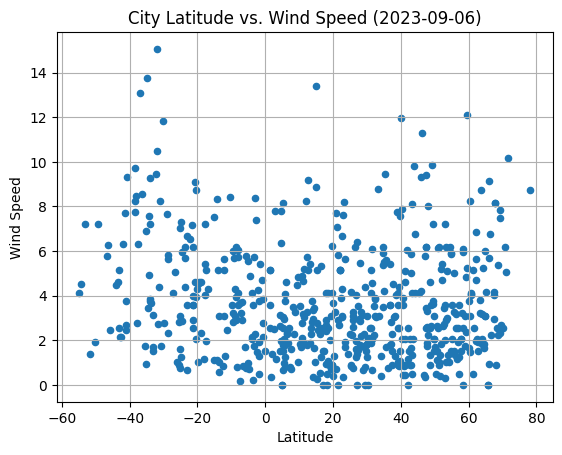

In [95]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots
def linear_reg_plot(xval, yval, lable): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
    lin_reg_val = xval * slope + intercept
    #graph the scatterplot
    plt.scatter(xval,yval)
    #graph the regression line
    plt.plot(xval,lin_reg_val,"r-")
    #lable the x and y axis
    plt.xlabel("Latitude")
    plt.ylabel(lable)
    #print the calculated value of the slot intercept equation
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [108]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,7.51,41,0,0.88,RU,1694059025
1,la ronge,55.1001,-105.2842,12.14,76,75,2.06,CA,1694059026
3,vila franca do campo,37.7167,-25.4333,21.23,87,89,4.51,PT,1694058792
4,mount pearl,47.5166,-52.7813,20.19,95,20,6.17,CA,1694058788
7,kerman,30.2832,57.0788,18.92,26,0,2.06,IR,1694059028


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,26.99,69,40,5.14,CC,1694059026
5,fale old settlement,-9.3852,-171.2468,27.95,78,41,6.02,TK,1694059027
6,adamstown,-25.0660,-130.1015,19.38,74,9,7.04,PN,1694059027
9,grytviken,-54.2811,-36.5092,-5.22,77,16,4.52,GS,1694058784
14,port mathurin,-19.6833,63.4167,22.52,74,6,4.54,MU,1694059029


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6331174450357572


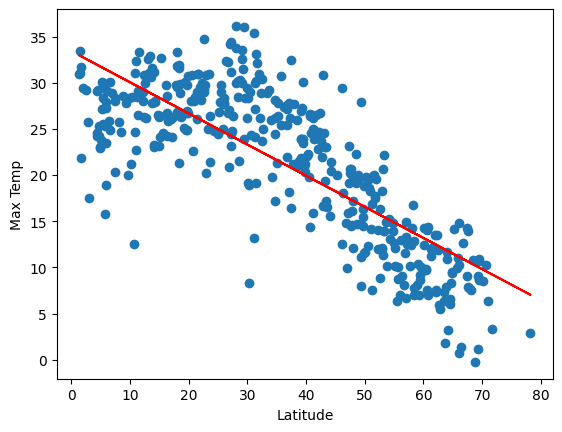

In [114]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Max Temp"]
linear_reg_plot(xval, yval, "Max Temp")

The r-value is: 0.5383942170205382


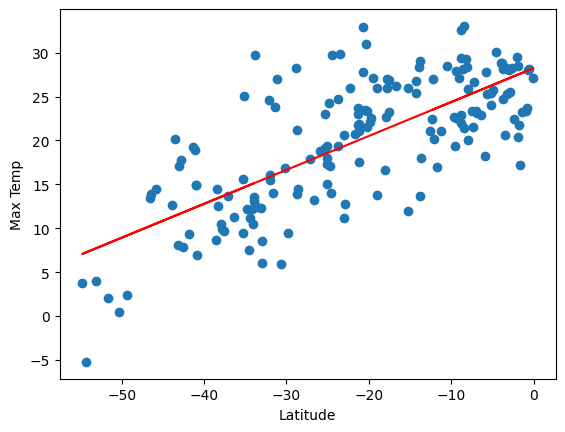

In [100]:
# Linear regression on Southern Hemisphere
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Max Temp"]
linear_reg_plot(xval, yval, "Max Temp")

**Discussion about the linear relationship:** as seen on both graphs, there is a very apparent relationship between latitude 0 and a high Maximum Temperature. The closer Latitude is to zero, the higher the max temp is likely to be. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0034457278825664054


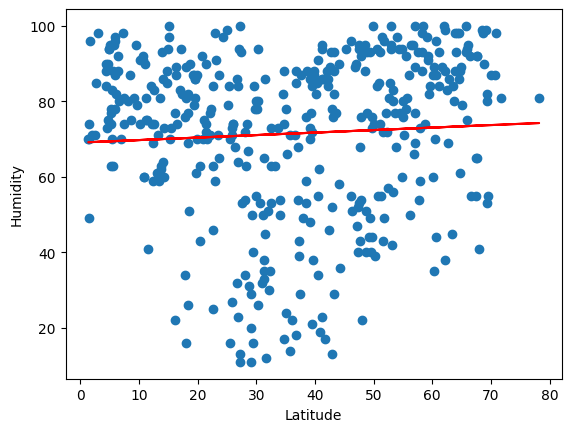

In [101]:
# Northern Hemisphere
# YOUR CODE HERE
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Humidity"]
linear_reg_plot(xval, yval, "Humidity")

The r-value is: 0.0007094221741923879


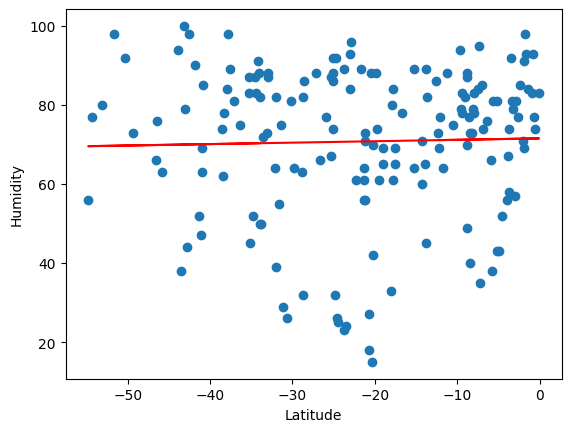

In [102]:
# Southern Hemisphere
# YOUR CODE HERE
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Humidity"]
linear_reg_plot(xval, yval, "Humidity")

**Discussion about the linear relationship:** given that the slope of the line trends positively as it approaches zero in both graphs, it is safe to say that there is a small correlation between a zero (0) latitude and higher humidity.

That said, given the near zero slope of each line, it is a VERY slight correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0025885639973110505


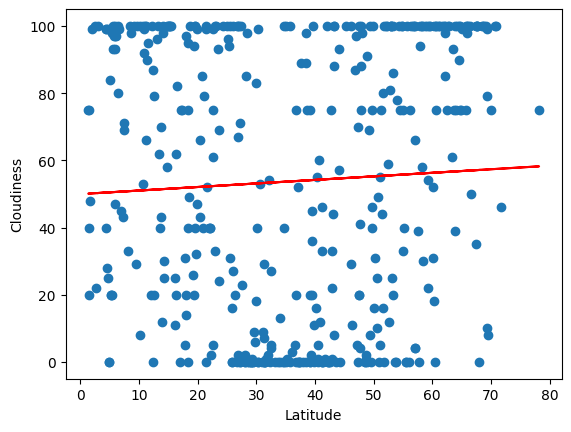

In [103]:
# Northern Hemisphere
# YOUR CODE HERE
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Cloudiness"]
linear_reg_plot(xval, yval, "Cloudiness")

The r-value is: 0.0012710323584266795


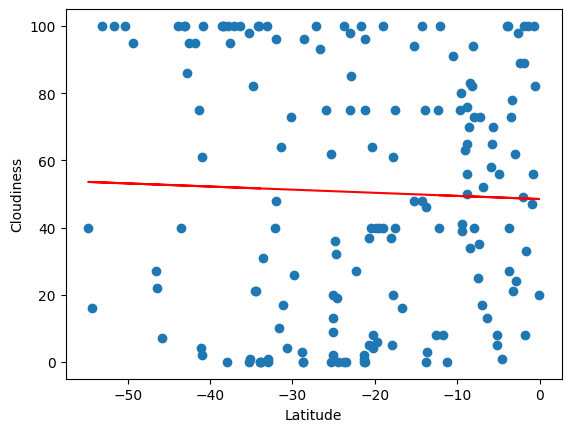

In [104]:
# Southern Hemisphere
# YOUR CODE HERE
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Cloudiness"]
linear_reg_plot(xval, yval, "Cloudiness")

**Discussion about the linear relationship:** given the inconsistant nature of the slope of each line in the graphs, paired with the shallowness of each line, it is safe to say that there is no real correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0025885639973110505


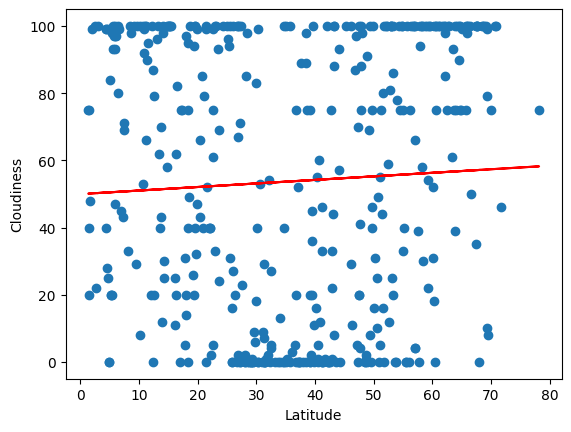

In [105]:
# Northern Hemisphere
# YOUR CODE HERE
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Cloudiness"]
linear_reg_plot(xval, yval, "Cloudiness")

The r-value is: 0.0012710323584266795


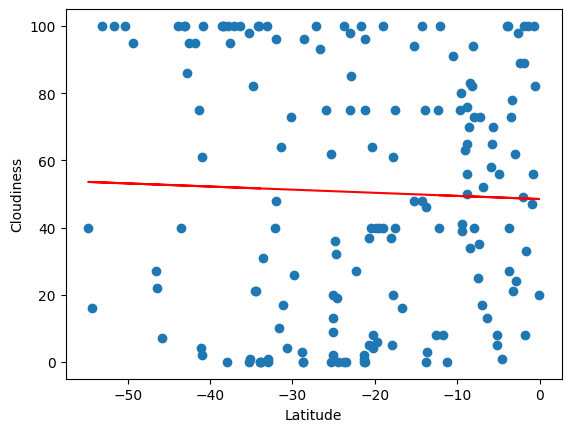

In [106]:
# Southern Hemisphere
# YOUR CODE HERE
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Cloudiness"]
linear_reg_plot(xval, yval, "Cloudiness")

**Discussion about the linear relationship:** There is little correlation between latitude, cloudiness and the differeing hemispheres. No solid conclusions can be drawn here.